In [6]:
import matplotlib.pyplot as plt
import numpy as np
from subprocess import call
import re
from collections import OrderedDict
import math

def SigmaFilter(data):
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    return data

OrderedDict([(8192, 9), (16384, 9), (32768, 9), (65536, 23), (131072, 23), (262144, 43), (524288, 73), (1048576, 73), (2097152, 73), (4194304, 84), (8388608, 123), (16777216, 201), (33554432, 193), (67108864, 192), (134217728, 192), (268435456, 191)])


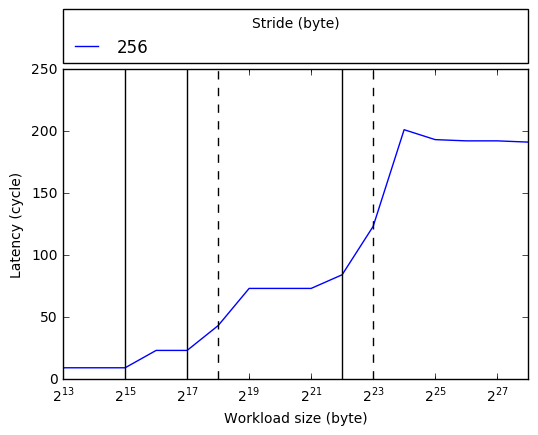

In [111]:
def translateSize(size):
    m1 = re.match("(\d+)KB", size)
    if m1 != None:
        return int(m1.group(1))*1024
    m2 = re.match("(\d+)MB", size)
    if m2 != None:
        return int(m2.group(1))*1024*1024

def loadLatencyData(filename):
    data = OrderedDict()
    for line in open(filename).readlines():
        #line = "workload size: 1KB	stride:1024	latency:3"
        m = re.match(r"(.+): (.+)\t(.+):(.+)\t(.+):(.+)", line)
        if m != None:
            #print m.group(1), m.group(2), m.group(3), m.group(4), m.group(5), m.group(6)
            lineData = data.get(int(m.group(4)), OrderedDict())
            lineData[translateSize(m.group(2))] = int(m.group(6))
            data[int(m.group(4))] = lineData
    return data
data = loadLatencyData('access_ptr.result')
data = {x:y for x, y in data.iteritems() if int(x) in[32, 64, 128, 256, 512, 1024]} #, 
for key, value in data.iteritems():
    #print value
    plt.semilogx(value.keys(), value.values(), label=key, basex=2)
    
plt.legend(title = "Stride (byte)", bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Workload size (byte)')
plt.ylabel('Latency (cycle)')
plt.axvline(x = 32*1024, color="k", linestyle = "-")
plt.axvline(x = 256*1024, color="k", linestyle = "--")
plt.axvline(x = 8*1024*1024, color="k", linestyle = "--")
plt.axvline(x = 128*1024, color="k", linestyle = "-")
plt.axvline(x = 4*1024*1024, color="k", linestyle = "-")
#plt.xticks(range(len(value.values())), value.keys())
plt.show()

In [21]:
cycle=0.358001 #ns
wlSize=6400/float(1024*1024) #MB
print wlSize

def cycle2Bw(c):
    return wlSize/(float(c)*cycle/1e9)

def analyzeBandwidthData(filename):
    readBw = []
    writeBw = []
    for line in open(filename).readlines():
        if line.startswith('read'):
            readBw.append(int(line.split()[1]))
        elif line.startswith('write'):
            writeBw.append(int(line.split()[1]))
    readBw = [x for x in readBw]
    writeBw = [x for x in writeBw]
    readBwMBs = [cycle2Bw(x) for x in readBw]
    writeBwMBs = [cycle2Bw(x) for x in writeBw]
    print 'readBw avg (cycle), standard variance:', np.average(readBw), math.sqrt(np.var(readBw))
    print 'writeBw avg (cycle), standard variance:', np.average(writeBw), math.sqrt(np.var(writeBw))
    print 'readBw avg(MBs), standard variance:', np.average(readBwMBs), math.sqrt(np.var(readBwMBs))
    print 'writeBw avg(MBs), standard variance:', np.average(writeBwMBs), math.sqrt(np.var(writeBwMBs))
analyzeBandwidthData('/tmp/bandwidth.result')

0.006103515625
readBw avg (cycle), standard variance: 2398.24 136.17452919
writeBw avg (cycle), standard variance: 2622.52 480.945537041
readBw avg(MBs), standard variance: 7131.15239595 394.490122927
writeBw avg(MBs), standard variance: 6709.49876645 1191.12060254


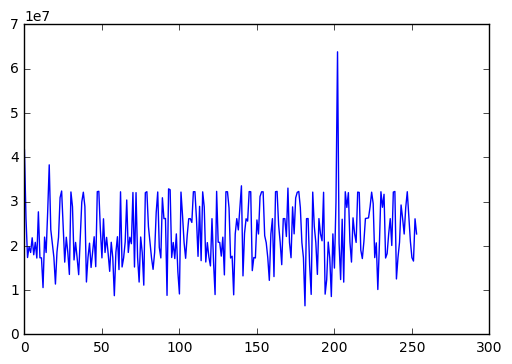

PageFault (cycle), standard variance: 22672005.8858 7299383.2799
PageFaule (ns), standard variance: 8116600.77913 2613186.51359


In [16]:
cycle=0.358001 #ns
def analyzePageFaultData(filename):
    data = []
    for line in open(filename).readlines():
        if line.startswith('map'):
            data.append(int(line.split()[1]))
    sigma = math.sqrt(np.var(data))
    avg = np.average(data)
    lb = avg - 3*sigma
    ub = avg + 3*sigma
    filteredData =[x for x in data if x > lb and x < ub]
    filteredDataNs = [x*cycle for x in filteredData]
    
    #filteredData = SigmaFilter(filteredData)
    #filteredDataNs = [x*cycle for x in filteredData]
    #filteredData = sorted(filteredData)
    plt.plot(filteredData)
    plt.show()
    print 'PageFault (cycle), standard variance:', np.average(filteredData), math.sqrt(np.var(filteredData))
    print 'PageFaule (ns), standard variance:', np.average(filteredDataNs), math.sqrt(np.var(filteredDataNs))
analyzePageFaultData('/tmp/pagefault.result')

In [1]:
1/2.801

0.3570153516601214